In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import plotly.express as px

In [15]:
%pip install --upgrade narwhals

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
df = pd.read_csv("Students_Grading_Dataset.csv")

In [5]:
df["Stress_Level (1-10)"] = df["Stress_Level (1-10)"].astype(float)

In [6]:
df.tail()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,Business,NaN,82.15,60.33,...,58.42,85.21,D,25.5,No,Yes,High School,Low,10.0,8.3
4996,S5996,Emma,Brown,student4996@university.com,Male,19,Business,65.11,86.31,49.80,...,60.87,95.96,C,5.0,No,Yes,NaN,Medium,4.0,4.0
4997,S5997,John,Brown,student4997@university.com,Female,24,CS,87.54,63.55,64.21,...,82.65,54.25,A,24.8,Yes,No,High School,Medium,4.0,6.3
4998,S5998,Sara,Davis,student4998@university.com,Male,23,CS,92.56,79.79,94.28,...,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1.0,8.4
4999,S5999,Maria,Brown,student4999@university.com,Female,21,Engineering,83.92,83.24,53.47,...,69.25,77.86,F,29.2,No,Yes,PhD,Low,2.0,6.1


In [44]:
print(df.isnull().sum())

Student_ID                    0
First_Name                    0
Last_Name                     0
Email                         0
Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
high_grades                   0
dtype: int64


In [8]:
df['Attendance (%)'].fillna(df['Attendance (%)'].mean(),inplace=True) 
df['Assignments_Avg'].fillna(df['Assignments_Avg'].mean(),inplace=True) 
df['Parent_Education_Level'].fillna(df['Parent_Education_Level'].mode()[0],inplace=True)

C:\Users\rozan\AppData\Local\Temp\ipykernel_16012\398806348.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance (%)'].fillna(df['Attendance (%)'].mean(),inplace=True)
C:\Users\rozan\AppData\Local\Temp\ipykernel_16012\398806348.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

distribuição das notas:
Grade
A    1495
B     978
D     889
F     844
C     794
Name: count, dtype: int64


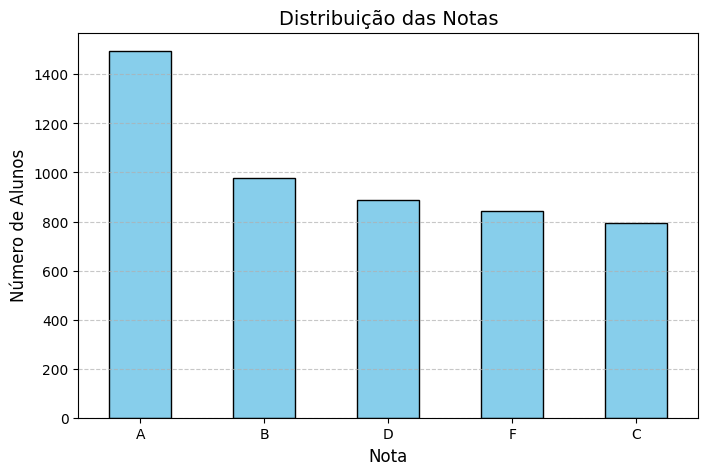

In [9]:
grade_distribution = pd.concat([df["Grade"]]).value_counts()

print("distribuição das notas:")
print(grade_distribution)

plt.figure(figsize=(8, 5))
grade_distribution.plot(kind="bar", color="skyblue", edgecolor="black")


plt.title("Distribuição das Notas", fontsize=14)
plt.xlabel("Nota", fontsize=12)
plt.ylabel("Número de Alunos", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)


plt.show()


distribuição das notas:
Department   Grade
Business     A        291
             B        197
             F        176
             C        174
             D        168
CS           A        596
             B        384
             D        366
             F        353
             C        323
Engineering  A        474
             B        295
             D        258
             F        234
             C        208
Mathematics  A        134
             B        102
             D         97
             C         89
             F         81
Name: count, dtype: int64


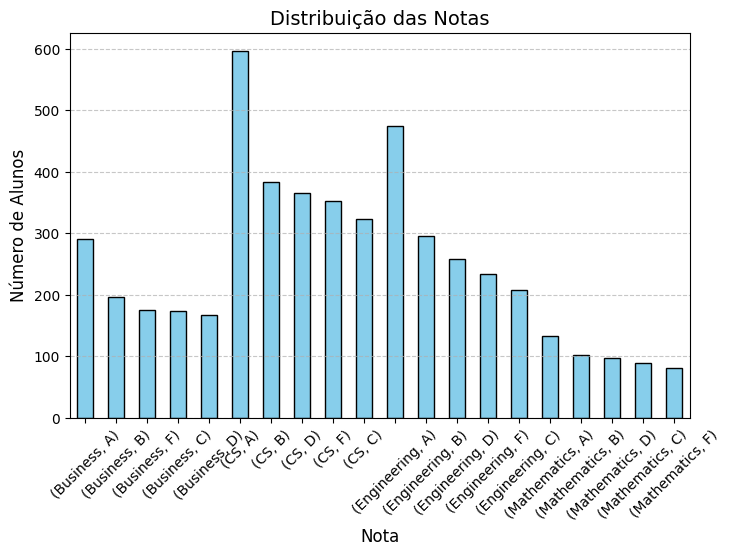

In [10]:
departaments_grade = df.groupby("Department")["Grade"].value_counts()

print("distribuição das notas:")
print(departaments_grade)

plt.figure(figsize=(8, 5))
departaments_grade.plot(kind="bar", color="skyblue", edgecolor="black")


plt.title("Distribuição das Notas", fontsize=14)
plt.xlabel("Nota", fontsize=12)
plt.ylabel("Número de Alunos", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)


plt.show()


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [16]:
duplicates = df[df.duplicated(subset=["First_Name", "Last_Name", "Email"], keep=False)]
print(f'Registros duplicados:{duplicates}')


Registros duplicados:Empty DataFrame
Columns: [Student_ID, First_Name, Last_Name, Email, Gender, Age, Department, Attendance (%), Midterm_Score, Final_Score, Assignments_Avg, Quizzes_Avg, Participation_Score, Projects_Score, Total_Score, Grade, Study_Hours_per_Week, Extracurricular_Activities, Internet_Access_at_Home, Parent_Education_Level, Family_Income_Level, Stress_Level (1-10), Sleep_Hours_per_Night]
Index: []

[0 rows x 23 columns]


In [22]:
grafico=px.scatter_matrix(df,dimensions=['Sleep_Hours_per_Night','Study_Hours_per_Week','Total_Score'])

grafico.show()

ImportError: cannot import name 'EagerSeriesNamespace' from 'narwhals._compliant.series' (c:\Users\rozan\Downloads\projetos\Lib\site-packages\narwhals\_compliant\series.py)

C:\Users\rozan\AppData\Local\Temp\ipykernel_16012\3195513228.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Grade"], y=df["Sleep_Hours_per_Night"], palette="coolwarm")


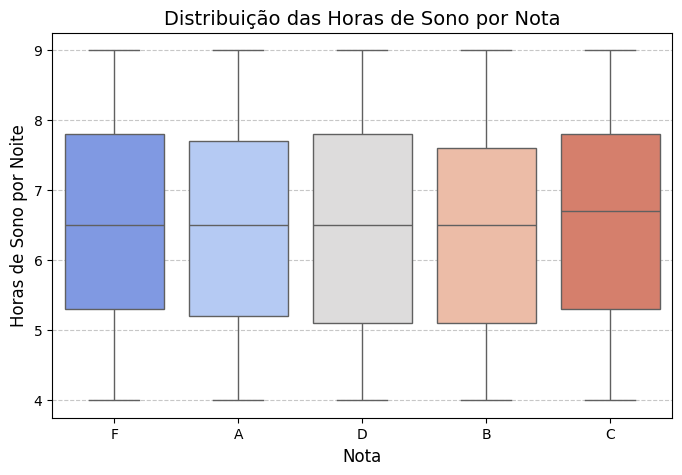

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Grade"], y=df["Sleep_Hours_per_Night"], palette="coolwarm")


plt.title("Distribuição das Horas de Sono por Nota", fontsize=14)
plt.xlabel("Nota", fontsize=12)
plt.ylabel("Horas de Sono por Noite", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)


plt.show()

In [24]:
stress_mean = df["Stress_Level (1-10)"].astype(float).mean()

print(f"Média do Stress Level: {stress_mean:.2f}")

Média do Stress Level: 5.48


In [25]:
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5.0,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,PhD,Medium,4.0,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6.0,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3.0,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2.0,7.1


In [26]:
education = pd.concat([df["Parent_Education_Level"]]).value_counts()

print("distribuição das notas:")
print(education)

distribuição das notas:
Parent_Education_Level
PhD            2614
Bachelor's      810
High School     796
Master's        780
Name: count, dtype: int64


In [27]:
correlation = df["Study_Hours_per_Week"].corr(df["Total_Score"])
print(f"Correlação entre Study_Hours_per_Week e Total_Score: {correlation:.2f}")

Correlação entre Study_Hours_per_Week e Total_Score: -0.01


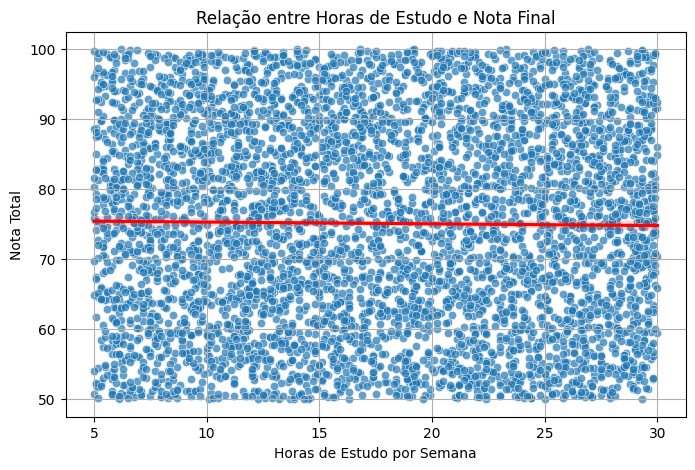

In [28]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Study_Hours_per_Week"], y=df["Total_Score"], alpha=0.7)


sns.regplot(x=df["Study_Hours_per_Week"], y=df["Total_Score"], scatter=False, color="red")

plt.title("Relação entre Horas de Estudo e Nota Final")
plt.xlabel("Horas de Estudo por Semana")
plt.ylabel("Nota Total")
plt.grid(True)
plt.show()

distribuição das notas:
Family_Income_Level  Grade
High                 A        305
                     B        207
                     C        183
                     D        182
                     F        167
Low                  A        598
                     B        374
                     D        361
                     F        341
                     C        309
Medium               A        592
                     B        397
                     D        346
                     F        336
                     C        302
Name: count, dtype: int64


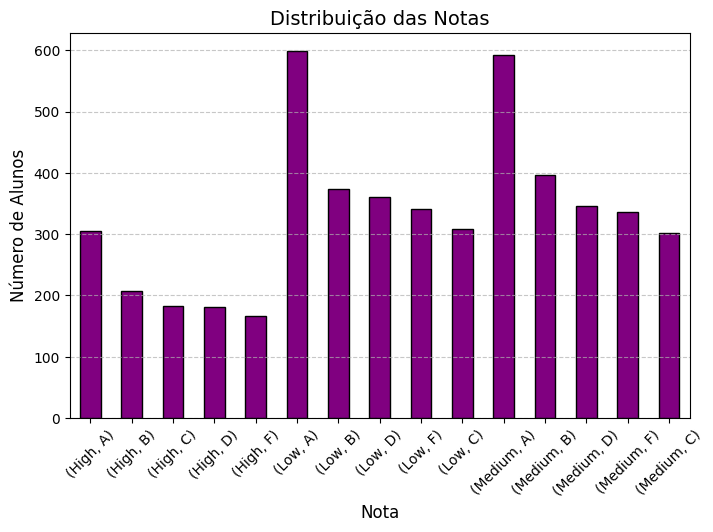

In [29]:
income_grade = df.groupby("Family_Income_Level")["Grade"].value_counts()

print("distribuição das notas:")
print(income_grade)

plt.figure(figsize=(8, 5))
income_grade.plot(kind="bar", color="purple", edgecolor="black")


plt.title("Distribuição das Notas", fontsize=14)
plt.xlabel("Nota", fontsize=12)
plt.ylabel("Número de Alunos", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)


plt.show()

distribuição das notas:
Parent_Education_Level  Grade
Bachelor's              A        223
                        B        161
                        D        151
                        F        140
                        C        135
High School             A        242
                        B        164
                        D        143
                        F        126
                        C        121
Master's                A        222
                        B        164
                        D        150
                        F        133
                        C        111
PhD                     A        808
                        B        489
                        D        445
                        F        445
                        C        427
Name: count, dtype: int64


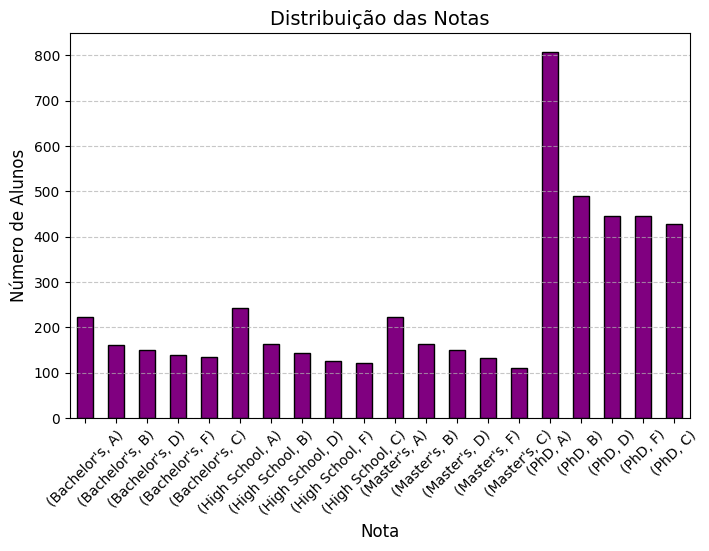

In [30]:
grade_education = df.groupby("Parent_Education_Level")["Grade"].value_counts()

print("distribuição das notas:")
print(grade_education)

plt.figure(figsize=(8, 5))
grade_education.plot(kind="bar", color="purple", edgecolor="black")


plt.title("Distribuição das Notas", fontsize=14)
plt.xlabel("Nota", fontsize=12)
plt.ylabel("Número de Alunos", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)


plt.show()

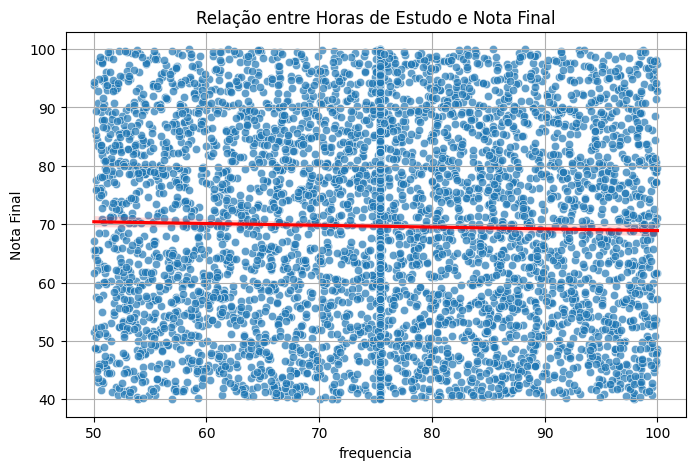

In [31]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Attendance (%)"], y=df["Final_Score"], alpha=0.7)


sns.regplot(x=df["Attendance (%)"], y=df["Final_Score"], scatter=False, color="red")

plt.title("Relação entre Horas de Estudo e Nota Final")
plt.xlabel("frequencia")
plt.ylabel("Nota Final")
plt.grid(True)
plt.show()

In [32]:
correlation = df["Sleep_Hours_per_Night"].corr(df["Stress_Level (1-10)"])
print(f"Correlação entre Study_Hours_per_Week e Stress_Level (1-10): {correlation:.2f}")

Correlação entre Study_Hours_per_Week e Stress_Level (1-10): 0.01


In [33]:
high_stress_students = df[df["Stress_Level (1-10)"] > 7]


mean_sleep_high_stress = high_stress_students["Sleep_Hours_per_Night"].mean()

print(f"Média de sono dos estudantes com alto nível de estresse: {mean_sleep_high_stress:.2f} horas")

Média de sono dos estudantes com alto nível de estresse: 6.50 horas


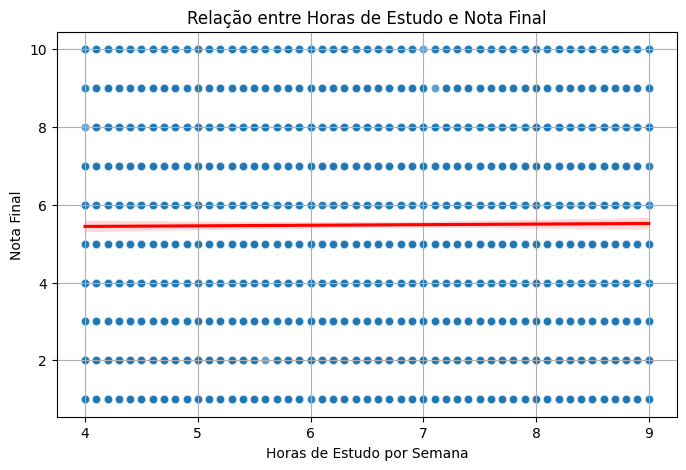

In [34]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Sleep_Hours_per_Night"], y=df["Stress_Level (1-10)"], alpha=0.7)


sns.regplot(x=df["Sleep_Hours_per_Night"], y=df["Stress_Level (1-10)"], scatter=False, color="red")

plt.title("Relação entre Horas de Estudo e Nota Final")
plt.xlabel("Horas de Estudo por Semana")
plt.ylabel("Nota Final")
plt.grid(True)
plt.show()

In [35]:
income_score_mean = df.groupby("Family_Income_Level")["Total_Score"].mean()

print("Média das notas por nível de renda:\n", income_score_mean)

Média das notas por nível de renda:
 Family_Income_Level
High      74.352510
Low       75.492063
Medium    75.156736
Name: Total_Score, dtype: float64


C:\Users\rozan\AppData\Local\Temp\ipykernel_16012\3674944454.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Family_Income_Level"], y=df["Total_Score"], palette="coolwarm")


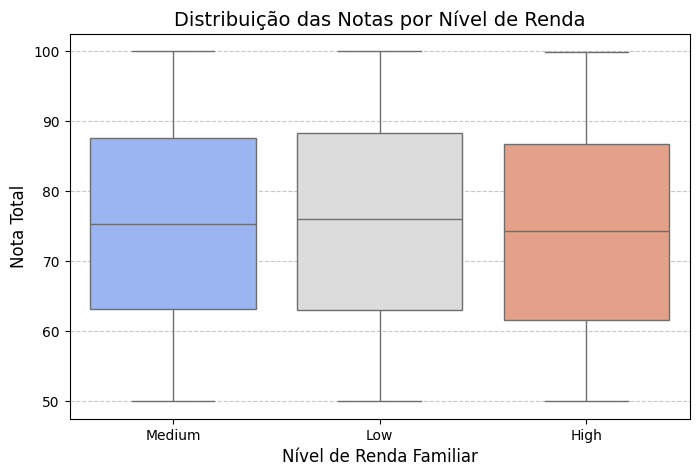

In [36]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Family_Income_Level"], y=df["Total_Score"], palette="coolwarm")

plt.title("Distribuição das Notas por Nível de Renda", fontsize=14)
plt.xlabel("Nível de Renda Familiar", fontsize=12)
plt.ylabel("Nota Total", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

distribuição das notas:
Extracurricular_Activities  Grade
No                          A        1068
                            B         670
                            F         604
                            D         595
                            C         556
Yes                         A         427
                            B         308
                            D         294
                            F         240
                            C         238
Name: count, dtype: int64


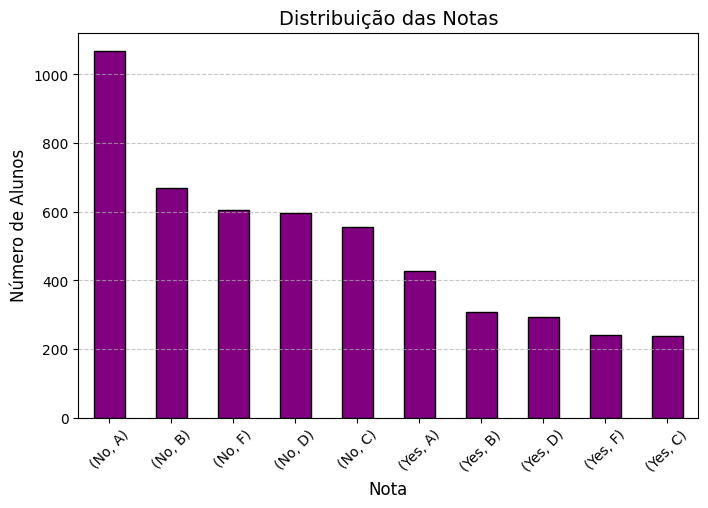

In [37]:
extra_activities_grades = df.groupby("Extracurricular_Activities")["Grade"].value_counts()

print("distribuição das notas:")
print(extra_activities_grades)

plt.figure(figsize=(8, 5))
extra_activities_grades.plot(kind="bar", color="purple", edgecolor="black")


plt.title("Distribuição das Notas", fontsize=14)
plt.xlabel("Nota", fontsize=12)
plt.ylabel("Número de Alunos", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)


plt.show()

In [38]:
performance_comparison = df.groupby("Extracurricular_Activities")["Total_Score"].mean()

# Exibir os resultados
print("Média do Total_Score para cada grupo:")
print(performance_comparison)

Média do Total_Score para cada grupo:
Extracurricular_Activities
No     75.065723
Yes    75.251792
Name: Total_Score, dtype: float64


In [39]:
df["high_grades"] = df["Grade"].apply(lambda x: "yes" if x in ["A", "B"] else "no")


df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,high_grades
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,56.09,F,6.2,No,Yes,High School,Medium,5.0,4.7,no
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,50.64,A,19.0,No,Yes,PhD,Medium,4.0,9.0,yes
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,70.30,D,20.7,No,Yes,Master's,Low,6.0,6.2,no
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,61.63,A,24.8,Yes,Yes,High School,High,3.0,6.7,yes
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,66.13,F,15.4,Yes,Yes,High School,High,2.0,7.1,no


In [40]:

internet = df.groupby("Extracurricular_Activities")["Total_Score"].mean()


print(internet)



Extracurricular_Activities
No     75.065723
Yes    75.251792
Name: Total_Score, dtype: float64


C:\Users\rozan\AppData\Local\Temp\ipykernel_16012\436827571.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Internet_Access_at_Home"], y=df["Total_Score"], palette="coolwarm")


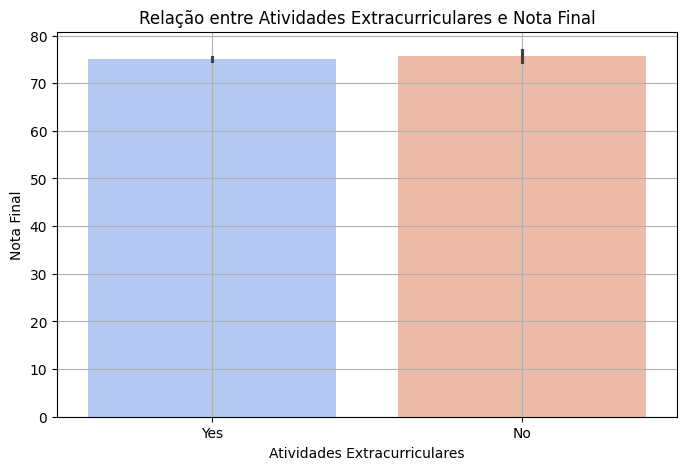

In [41]:
plt.figure(figsize=(8, 5))

sns.barplot(x=df["Internet_Access_at_Home"], y=df["Total_Score"], palette="coolwarm")

plt.title("Relação entre Atividades Extracurriculares e Nota Final")
plt.xlabel("Atividades Extracurriculares")
plt.ylabel("Nota Final")
plt.grid(True)


plt.show()

distribuição das notas:
Gender  Grade
Female  A        754
        B        471
        D        438
        F        403
        C        383
Male    A        741
        B        507
        D        451
        F        441
        C        411
Name: count, dtype: int64


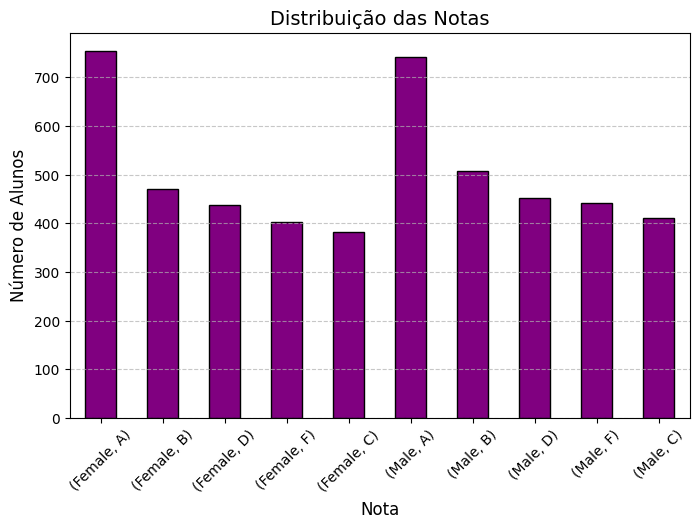

In [ ]:
gender_grades = df.groupby("Gender")["Grade"].value_counts()

print("distribuição das notas:")
print(gender_grades)

plt.figure(figsize=(8, 5))
gender_grades.plot(kind="bar", color="purple", edgecolor="black")


plt.title("Distribuição das Notas", fontsize=14)
plt.xlabel("Nota", fontsize=12)
plt.ylabel("Número de Alunos", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)


plt.show()

C:\Users\rozan\AppData\Local\Temp\ipykernel_16012\2018006111.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Department"], y=df["Stress_Level (1-10)"], palette="coolwarm")


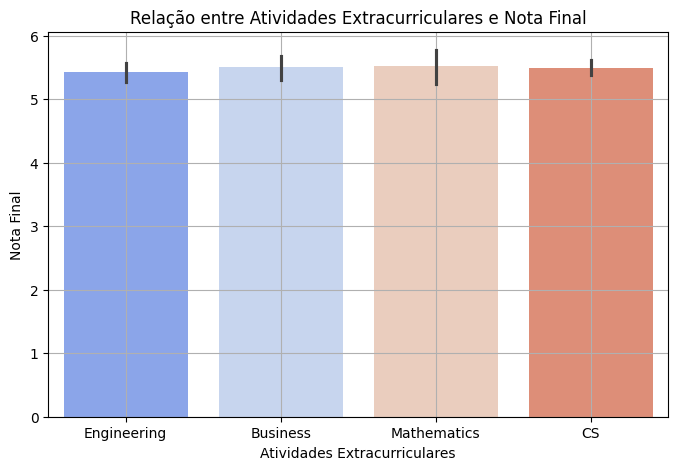

In [42]:
plt.figure(figsize=(8, 5))

sns.barplot(x=df["Department"], y=df["Stress_Level (1-10)"], palette="coolwarm")

plt.title("Relação entre Atividades Extracurriculares e Nota Final")
plt.xlabel("Atividades Extracurriculares")
plt.ylabel("Nota Final")
plt.grid(True)


plt.show()

In [43]:
df.to_csv('Students_Grading.csv', index=False)

